In [522]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Dataset Description:

### Personal details
age: Age of the individual
### Categorical data
* sex: Gender of the individual (0 = female, 1 = male)
* chest pain type(cp): Type of chest pain (4 categories: 0-3)
* fasting blood sugar(fbs): Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
* restecg(resting electrocardiographic results): ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable/definite left ventricular hypertrophy)
* exang(exercise induced angina): Exercise-induced chest pain (1 = yes, 0 = no)
* slope: The slope of the peak exercise ST segment (0-2)
* ca (number of major vessels): Number of major vessels (0-) colored by fluoroscopy
* thal: Type of thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)
* target: Presence of heart disease (1 = Yes, 0 = No)

### Other health parameters
* resting blood pressure(trestbp): Resting blood pressure (94–200 mmHg)
* serum cholesterol(chol): Cholesterol level (126–564 mg/dl)
* maximum heart rate achieved(thalach): (71–202 bpm)
* oldpeak: ST depression induced by exercise relative to rest (0.0–6.2).




In [524]:
data=pd.read_csv("C:\\Users\\Jyothy\\Downloads\\heart_disease.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [525]:
data.shape # Returns number of rows and columns

(1025, 14)

In [526]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### All columns are numerical with no null values present.

In [528]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Checking for missing values

In [530]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

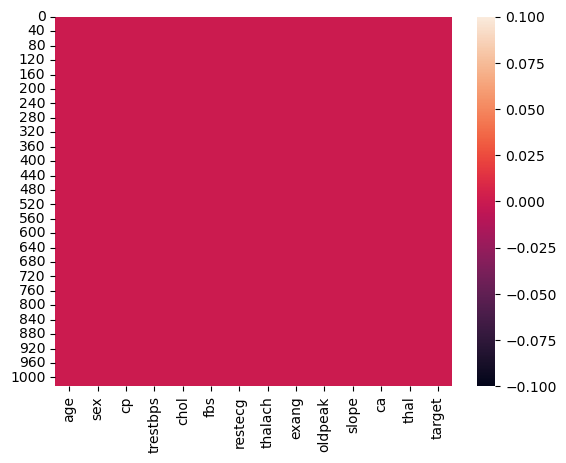

In [531]:
sb.heatmap(data.isna())
plt.show()

### There are no missing values

## Checking for duplicate rows

In [534]:
 data.duplicated().sum()

723

#### There are 723 duplicate rows in the dataset

## Checking for duplicate columns visually

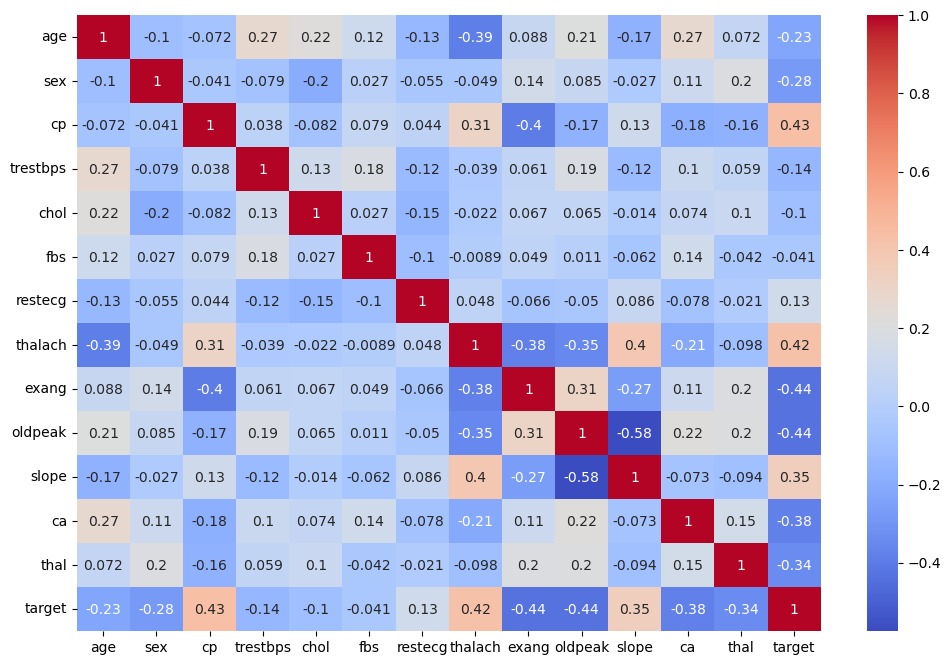

In [537]:
plt.figure(figsize=(12, 8)) 
sb.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

## There are no duplicate columns

### Removing duplicate rows

In [540]:
# Removes all duplicate rows except the first occurrence
duplicates = data.duplicated()
duplicate_removed = data[~duplicates]  # Keep rows where duplicates is False (not a duplicate)
duplicate_removed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Outlier Handling

In [545]:
num_cols=['trestbps', 'chol', 'thalach', 'oldpeak']
num_data=duplicate_removed[num_cols]
display(num_data)

,trestbps,chol,thalach,oldpeak
0,125,212,168,1.0
1,140,203,155,3.1
2,145,174,125,2.6
3,148,203,161,0.0
4,138,294,106,1.9
...,...,...,...,...
723,120,211,115,1.5
733,108,141,175,0.6
739,128,255,161,0.0
843,160,273,125,0.0


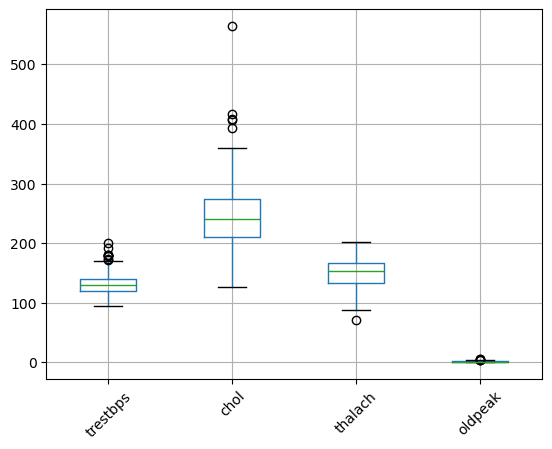

In [546]:
num_data.boxplot()
plt.xticks(rotation = 45)
plt.show()

### Cholestrol level('chol'), resting blood pressure('trestbps'), maximum heart rate achieved('thalach') and ST depression induced by exercise relative to rest('oldpeak') shows outliers.
note: number of major vessels colored by fluoroscopy('ca') and type of thalassemia('thal') shows outliers.

### Handling outliers: Replacing/Removing outliers is not recommended in health related data, as it might result in misdiagnosis. But here, since outlier handling is part of the question, I am using IQR method to replace the outliers.

In [549]:
def remove_outliers (df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    df[column_name] =   df[column_name].clip(upper = upper_bound)
    df[column_name] =   df[column_name].clip(lower = lower_bound)
    return df[column_name]

In [550]:
# Identify numerical columns
num_cols=['trestbps', 'chol', 'thalach', 'oldpeak']
for col in num_cols:
    duplicate_removed[col] = remove_outliers(duplicate_removed,col)

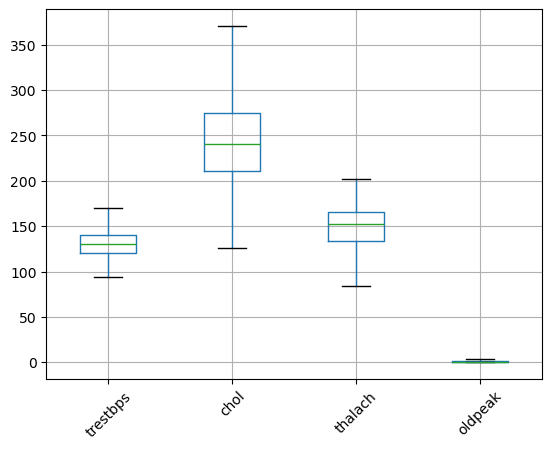

In [575]:
duplicate_removed[['trestbps', 'chol', 'thalach', 'oldpeak']].boxplot()
plt.xticks(rotation = 45)
plt.show()

## Correlation

<Axes: >

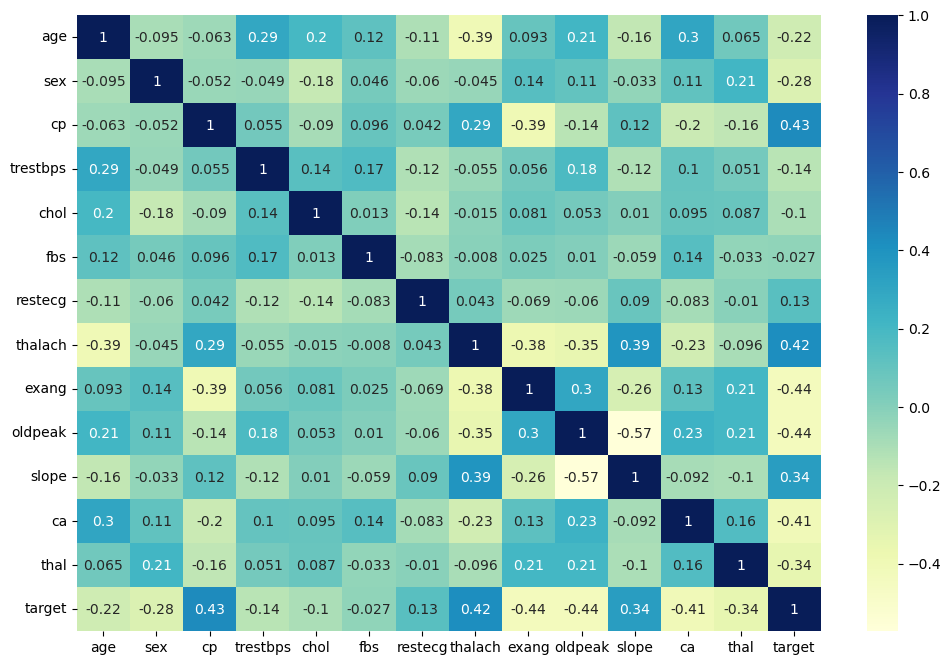

In [577]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
dataplot = sb.heatmap(duplicate_removed.corr(numeric_only=True), cmap="YlGnBu", annot=True)
dataplot

## Scaling

In [589]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
duplicate_removed[num_cols] = min_max.fit_transform(duplicate_removed[num_cols])

In [593]:
# plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
# dataplot = sb.heatmap(duplicate_removed.corr(numeric_only=True), cmap="YlGnBu", annot=True)
# dataplot

## Regression

In [603]:
from sklearn.model_selection import train_test_split

In [605]:
y= duplicate_removed['chol']
X = duplicate_removed.drop("chol",axis = 1)

In [607]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [609]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
model = LinearRegression()

In [611]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [613]:
mse = mean_squared_error( y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error" , mse)
print("R2 score :", r2)

Mean Squared Error 0.0393571140696442
R2 score : 0.07648878209811605


#### A lower MSE indicates that the model's predictions are closer to the actual values.

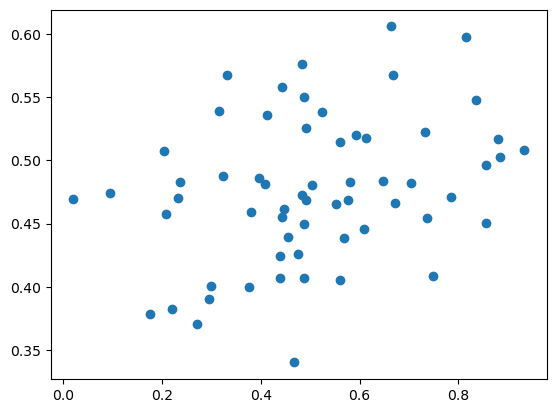

In [615]:
plt.scatter(y_test, y_pred)

## Reference:
## The dataset contains the following columns:

### age: Age of the individual.
### sex: Gender of the individual (1 = male, 0 = female).
### cp: Chest pain type (categorical variable with values 0–3):
* 0: Typical angina
* 1: Atypical angina
* 2: Non-anginal pain
* 3: Asymptomatic
##### Angina: A type of chest pain caused by reduced blood flow to the heart.
### trestbps: Resting blood pressure (in mm Hg).
### chol: Serum cholesterol level (in mg/dL).
### fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
### restecg: Resting electrocardiographic results (categorical variable with values 0–2):
* 0: Normal
* 1: Having ST-T wave abnormality (e.g., T wave inversions and/or ST elevation or depression of > 0.05 mV)
* 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
### thalach: Maximum heart rate achieved.
### exang: Exercise-induced chest pain  (1 = yes, 0 = no).
### oldpeak: ST depression induced by exercise relative to rest.
### slope: Changes in the ST segment during a stress test or physical exercise.  (categorical variable with values 0–2):
* 0: Upsloping
* 1: Flat
* 2: Downsloping
### ca: Coronary Arteries (Number of major vessels (0–3) colored by fluoroscopy.)
### thal: Thalassemia (categorical variable with values 1–3):
* 0: Normal
* 1: fixed defect
* 2: Reversible defect
#### Thalassemia: Group of disorders that affect the body's ability to produce hemoglobin and red blood cells properly. 
### target: Presence of heart disease (1 = heart disease, 0 = no heart disease).

## Related facts:
#### Why Are Coronary Arteries Colored in Fluoroscopy?
##### Fluoroscopy is used in angiography, a medical imaging technique that visualizes the coronary arteries by injecting a contrast dye into the blood vessels. The dye makes the arteries appear "colored" on the X-ray, allowing physicians to assess:

* The openness (patency) of the vessels.
* The presence of blockages or narrowing (stenosis).
* Blood flow through the heart's major vessels.
#### Based on number of colored arteries, we can make following inferences:
##### Higher Number of Colored Arteries (e.g., 3):
* Indicates that all major vessels are open and functioning normally.
* Suggests minimal or no significant obstruction in blood flow.
* Implies a lower risk of coronary artery disease (CAD).

##### Lower Number of Colored Arteries (e.g., 0 or 1):
* Suggests that few or none of the major vessels are open or visible due to severe narrowing or blockages.
* Indicates reduced blood flow, which is a hallmark of ischemic heart disease.
* Suggests a higher risk of heart disease, potentially requiring intervention (e.g., angioplasty, bypass surgery).

##### Intermediate Numbers (e.g., 2):
* Suggests partial obstruction or issues in one of the three major vessels.
* Indicates moderate risk and could lead to symptoms like angina (chest pain) or breathlessness during exertion.